In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import sns as sns
from matplotlib import font_manager, rc
font_path = r'C:\Windows\Fonts\gulim.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
with open('ELITISM-0.085MUTATION-0.191_len(500).pkl', 'rb') as f:
    result = pickle.load(f)
with open('results2(len100).pkl', 'rb') as f:
    result2 = pickle.load(f)
with open('result.pkl', 'rb') as f:
    result3 = pickle.load(f)
with open('ELITISM-0.092MUTATION-0.05len(300).pkl', 'rb') as f:
    result4 = pickle.load(f)
with open('../multi_start/multi_start(len300).pkl', 'rb') as f:
    result5 = pickle.load(f)


In [ ]:
def get_mutate_elite(result):
    result['ELITISM_RATE'] = result['params'].apply(lambda x: x['ELITISM_RATE'])
    result['MUTATION_RATE'] = result['params'].apply(lambda x:x['MUTATION_RATE'])
    result['POPULATION_SIZE'] = result['params'].apply(lambda x:x['POPULATION_SIZE'])
    result['GENERATION_SIZE'] = result['params'].apply(lambda x:x['GENERATION_SIZE'])
    result['rank'] = range(1, len(result)+1)
    result = result.drop('params', axis=1)
    result = result.drop('fitness', axis=1)
    return result

def show_df(df, param1, param2):
    # ELITISM_RATE, MUTATION_RATE, Fitness에 대한 산점도 그래프 출력
    # fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=200)
    fig = plt.figure(figsize=(10, 5), dpi=100)
    plt.scatter(df[param1], df[param2])
    plt.title(f'{param1} vs {param2}')
    plt.xlabel(f'{param1}')
    plt.ylabel(f'{param2}')
    # axs[0].scatter(df[param1], range(0,len(df)))
    # axs[0].set_xlabel(f'{param1}')
    # axs[0].set_ylabel(f'{param2}')
    # axs[0].set_title(f'{param1} vs {param2}')
    # axs[1].scatter(df['MUTATION_RATE'], range(0,len(df)))
    # axs[1].set_xlabel('피트니스 내림차순')
    # axs[1].set_ylabel('MUTATION_RATE')
    # axs[1].set_title('Mutation Rate')
    plt.show()

def show_elite(df):
    # 그래프 출력 설정
    fig = plt.figure(figsize=(10, 5), dpi=100)
    plt.scatter(range(0,len(df)), df['ELITISM_RATE'])
    plt.title('Scatter Plot')
    plt.xlabel('피트니스 내림차순')
    plt.ylabel('ELITISM_RATE')
    plt.show()


In [ ]:
df1 = get_mutate_elite(result)
df2 = get_mutate_elite(result2)
df3 = get_mutate_elite(result3)
df4 = get_mutate_elite(result4)

In [ ]:
fig = plt.figure(figsize=(30, 30), dpi=300)
pd.plotting.scatter_matrix(df1, figsize=(10, 10))
plt.show()


In [43]:
ga_t_test = result4['fitness']
ga_t_test = pd.concat([ga_t_test, pd.Series(['ga'] * len(ga_t_test))], axis=1)
ga_t_test.columns = ['fitness', 'group']

multi_start_t_test = result5['fitness']
multi_start_t_test = pd.concat([multi_start_t_test, pd.Series(['multistart'] * len(multi_start_t_test))], axis=1)
multi_start_t_test.columns = ['fitness', 'group']

In [50]:
concatenated_df = pd.concat([ga_t_test, multi_start_t_test], axis=0)

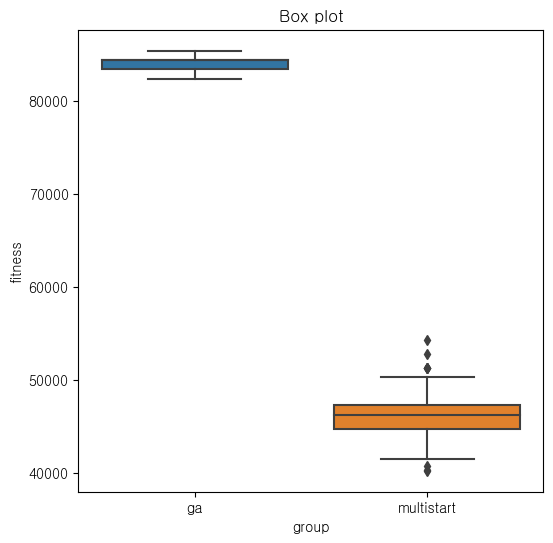

In [56]:
# result4(ga), result5(multistart)
import seaborn as sns
from scipy.stats import shapiro
plt.figure(figsize=(6,6))
sns.boxplot(x='group', y='fitness', data=concatenated_df)
plt.title('Box plot')
plt.show()

In [67]:
from scipy import stats
import numpy as np

#샘플 데이터 생성
group1 = result4['fitness']
group2 = result5['fitness']

#등분산 t-검정
t, p = stats.ttest_ind(group1, group2, equal_var=True)

print("t-statistic:", t)
print("p-value:", p)


t-statistic: 297.38319785160303
p-value: 0.0


In [1]:
import os
os.getcwd()



'C:\\Users\\Parkjunho\\PycharmProjects\\Shipyard-process\\transporter\\measurement'

In [62]:
import random

# 노드 개수와 클러스터 크기
node_count = 36
cluster_size = 9

# 클러스터 정보 생성 함수
def create_clusters(node_count, cluster_size):
    if node_count % cluster_size != 0:
        raise ValueError("노드 개수와 클러스터 크기가 나누어 떨어져야 합니다.")

    clusters = []
    for i in range(node_count // cluster_size):
        start_node = i * cluster_size + 1
        end_node = start_node + cluster_size - 1
        clusters.append((start_node, end_node))
    return clusters


# 시작 노드와 끝 노드 선택 함수
def select_start_end_nodes(clusters, inner_cluster_prob=0.7):
    if random.random() < inner_cluster_prob:
        # 클러스터 내에서 뽑음
        cluster_index = random.randint(0, len(clusters)-1)
        cluster = range(clusters[cluster_index][0], clusters[cluster_index][1])
        start_node, end_node = random.sample(cluster, k=2)
    else:
        # 클러스터 사이에서 뽑음
        start_cluster_index, end_cluster_index = random.sample(range(0,len(clusters)), k=2)
        start_node = random.randint(clusters[start_cluster_index][0], clusters[start_cluster_index][1])
        end_node = random.randint(clusters[end_cluster_index][0], clusters[end_cluster_index][1])

    return start_node, end_node



클러스터 내에서 뽑기 3
Start node: 35, End node: 32


In [69]:
# 클러스터 생성 및 시작 노드와 끝 노드 선택
clusters = create_clusters(node_count, cluster_size)
start_node, end_node = select_start_end_nodes(clusters)

print(f"Start node: {start_node}, End node: {end_node}")

클러스터 사이에서 뽑기 3, 1
Start node: 29, End node: 11


In [ ]:
node_file_path = os.path.join(os.getcwd(), '..', "create_data", "data", "cluster", "node(cluster3).csv")
graph = Graph(node_file_path)
